[*********************100%%**********************]  1 of 1 completed


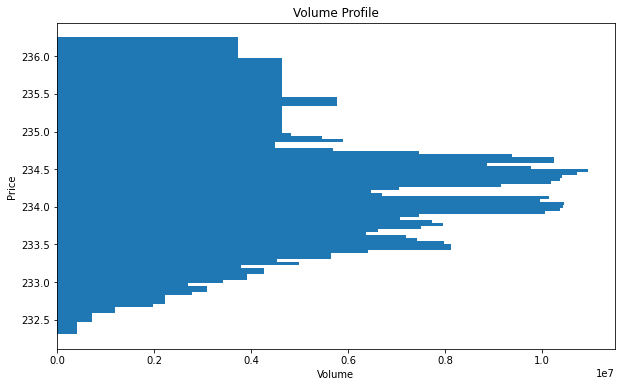

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start, interval='5m'):
    """
    Fetch stock data from Yahoo Finance.
    :param ticker: Stock ticker symbol
    :param start: Start date for data (YYYY-MM-DD)
    :param interval: Data interval (e.g., '1d', '5m')
    :return: DataFrame with stock data
    """
    stock_data = yf.download(ticker, start=start, interval=interval)
    return stock_data

def calculate_volume_profile(data, bins=100):
    """
    Calculate the volume profile.
    :param data: DataFrame with stock data
    :param bins: Number of bins for price levels
    :return: volume profile DataFrame
    """
    price_min = data['Low'].min()
    price_max = data['High'].max()
    bin_edges = np.linspace(price_min, price_max, bins)
    
    volume_profile = pd.DataFrame(index=bin_edges[:-1], columns=['Volume'])
    volume_profile['Volume'] = 0

    for index, row in data.iterrows():
        # Determine which bins the high and low price fall into
        bin_indices = np.digitize([row['Low'], row['High']], bin_edges) - 1
        
        # Ensure bin indices are within the valid range
        bin_indices = [max(0, min(bins-2, b)) for b in bin_indices]
        
        # Increment volume in corresponding bins
        for i in range(bin_indices[0], bin_indices[1] + 1):
            volume_profile.iloc[i] += row['Volume']
        
    return volume_profile

def plot_volume_profile(volume_profile):
    """
    Plot the volume profile.
    :param volume_profile: DataFrame with volume profile
    """
    plt.figure(figsize=(10, 6))
    plt.barh(volume_profile.index, volume_profile['Volume'], height=volume_profile.index[1] - volume_profile.index[0])
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.title('Volume Profile')
    plt.show()

# Example usage
ticker = 'AAPL'
start_date = '2024-07-16'

data = fetch_stock_data(ticker, start=start_date, interval='5m')
volume_profile = calculate_volume_profile(data, bins=100)
plot_volume_profile(volume_profile)


[*********************100%%**********************]  1 of 1 completed


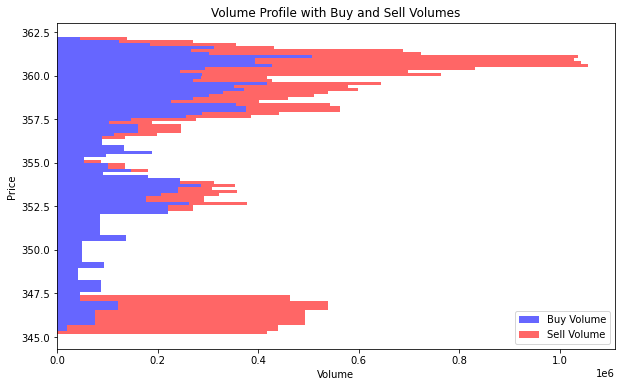

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start, interval='5m'):
    """
    Fetch stock data from Yahoo Finance.
    :param ticker: Stock ticker symbol
    :param start: Start date for data (YYYY-MM-DD)
    :param interval: Data interval (e.g., '1d', '5m')
    :return: DataFrame with stock data
    """
    stock_data = yf.download(ticker, start=start, interval=interval)
    return stock_data

def calculate_volume_profile(data, bins=100):
    """
    Calculate the volume profile.
    :param data: DataFrame with stock data
    :param bins: Number of bins for price levels
    :return: volume profile DataFrame with buy and sell volumes
    """
    price_min = data['Low'].min()
    price_max = data['High'].max()
    bin_edges = np.linspace(price_min, price_max, bins)
    
    volume_profile = pd.DataFrame(index=bin_edges[:-1], columns=['Buy Volume', 'Sell Volume'])
    volume_profile['Buy Volume'] = 0
    volume_profile['Sell Volume'] = 0

    for index, row in data.iterrows():
        # Determine which bins the high and low price fall into
        bin_indices = np.digitize([row['Low'], row['High']], bin_edges) - 1
        
        # Ensure bin indices are within the valid range
        bin_indices = [max(0, min(bins-2, b)) for b in bin_indices]
        
        # Separate buy and sell volumes
        if row['Close'] > row['Open']:
            volume_profile.iloc[bin_indices[0]:bin_indices[1] + 1, volume_profile.columns.get_loc('Buy Volume')] += row['Volume']
        else:
            volume_profile.iloc[bin_indices[0]:bin_indices[1] + 1, volume_profile.columns.get_loc('Sell Volume')] += row['Volume']
        
    return volume_profile

def plot_volume_profile(volume_profile):
    """
    Plot the volume profile with buy and sell volumes.
    :param volume_profile: DataFrame with volume profile
    """
    plt.figure(figsize=(10, 6))
    plt.barh(volume_profile.index, volume_profile['Buy Volume'], height=volume_profile.index[1] - volume_profile.index[0], color='blue', alpha=0.6, label='Buy Volume')
    plt.barh(volume_profile.index, volume_profile['Sell Volume'], height=volume_profile.index[1] - volume_profile.index[0], color='red', alpha=0.6, label='Sell Volume', left=volume_profile['Buy Volume'])
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.title('Volume Profile with Buy and Sell Volumes')
    plt.legend()
    plt.show()

# Example usage
ticker = 'CAT'
start_date = '2024-07-16'

data = fetch_stock_data(ticker, start=start_date, interval='5m')
volume_profile = calculate_volume_profile(data, bins=100)
plot_volume_profile(volume_profile)


In [5]:
import yfinance as yf
import numpy as np
import pandas as pd

def fetch_stock_data(ticker, start, interval='5m'):
    """
    Fetch stock data from Yahoo Finance.
    :param ticker: Stock ticker symbol
    :param start: Start date for data (YYYY-MM-DD)
    :param interval: Data interval (e.g., '1d', '5m')
    :return: DataFrame with stock data
    """
    stock_data = yf.download(ticker, start=start, interval=interval)
    return stock_data

def calculate_volume_profile(data, bins=100):
    """
    Calculate the volume profile.
    :param data: DataFrame with stock data
    :param bins: Number of bins for price levels
    :return: volume profile DataFrame with buy and sell volumes
    """
    price_min = data['Low'].min()
    price_max = data['High'].max()
    bin_edges = np.linspace(price_min, price_max, bins)
    
    volume_profile = pd.DataFrame(index=bin_edges[:-1], columns=['Buy Volume', 'Sell Volume'])
    volume_profile['Buy Volume'] = 0
    volume_profile['Sell Volume'] = 0

    for index, row in data.iterrows():
        # Determine which bins the high and low price fall into
        bin_indices = np.digitize([row['Low'], row['High']], bin_edges) - 1
        
        # Ensure bin indices are within the valid range
        bin_indices = [max(0, min(bins-2, b)) for b in bin_indices]
        
        # Separate buy and sell volumes
        for i in range(bin_indices[0], bin_indices[1] + 1):
            if row['Close'] > row['Open']:
                volume_profile.iloc[i, volume_profile.columns.get_loc('Buy Volume')] += row['Volume']
            else:
                volume_profile.iloc[i, volume_profile.columns.get_loc('Sell Volume')] += row['Volume']
        
    return volume_profile

def identify_volume_ranges(volume_profile):
    """
    Identify and print ranges with only buy or sell volumes.
    :param volume_profile: DataFrame with volume profile
    """
    buy_ranges = []
    sell_ranges = []
    buy_range = []
    sell_range = []

    for price, row in volume_profile.iterrows():
        if row['Buy Volume'] > 0 and row['Sell Volume'] == 0:
            if not buy_range:
                buy_range = [price]
            buy_range.append(price)
        else:
            if buy_range:
                buy_ranges.append(buy_range)
                buy_range = []

        if row['Sell Volume'] > 0 and row['Buy Volume'] == 0:
            if not sell_range:
                sell_range = [price]
            sell_range.append(price)
        else:
            if sell_range:
                sell_ranges.append(sell_range)
                sell_range = []

    if buy_range:
        buy_ranges.append(buy_range)
    if sell_range:
        sell_ranges.append(sell_range)

    print("Buy volume only prices:")
    for r in buy_ranges:
        print(f"[{r[0]:.2f} - {r[-1]:.2f}] with detailed volumes: {volume_profile.loc[r[0]:r[-1], 'Buy Volume'].to_dict()}")

    print("\nSell volume only prices:")
    for r in sell_ranges:
        print(f"[{r[0]:.2f} - {r[-1]:.2f}] with detailed volumes: {volume_profile.loc[r[0]:r[-1], 'Sell Volume'].to_dict()}")

# Example usage
ticker = 'AAPL'
start_date = '2024-07-19'

data = fetch_stock_data(ticker, start=start_date, interval='1m')
volume_profile = calculate_volume_profile(data, bins=100)
identify_volume_ranges(volume_profile)


[*********************100%%**********************]  1 of 1 completed
Buy volume only prices:
[223.27 - 223.31] with detailed volumes: {223.27499389648438: 80011, 223.31060004956794: 80011}

Sell volume only prices:


In [36]:
ticker = 'AAPL'
start_date = '2024-07-18'
interval='5m'
data = yf.download(ticker, start=start_date, interval=interval)

data.reset_index(inplace=True,drop=False)



[*********************100%%**********************]  1 of 1 completed


In [29]:
data.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-07-19 09:30:00-04:00,247.720993,249.009995,246.600006,247.649002,247.649002,4777046
1,2024-07-19 09:35:00-04:00,247.550095,248.990005,245.222000,247.154999,247.154999,2478581
2,2024-07-19 09:40:00-04:00,247.149994,247.889999,245.660004,245.690002,245.690002,1665298
3,2024-07-19 09:45:00-04:00,245.669998,246.039993,244.399994,245.020004,245.020004,2526077
4,2024-07-19 09:50:00-04:00,244.979996,247.710007,244.770004,246.539993,246.539993,2289072


In [30]:
data['Open'] = round(data['Open'],2)
data['High'] = round(data['High'],2)
data['Low'] = round(data['Low'],2)
data['Close'] = round(data['Close'],2)

# Calculate net_volume
data['Net Volume'] = 0
data.loc[0, 'Net Volume'] = data.loc[0, 'Volume']

for i in range(1, len(data)):
    if data.loc[i, 'Close'] > data.loc[i, 'Open']:
        data.loc[i, 'Net Volume'] = data.loc[i-1, 'Volume'] + data.loc[i, 'Volume']
    else:
        data.loc[i, 'Net Volume'] = data.loc[i-1, 'Volume'] - data.loc[i, 'Volume']


In [37]:
data[(data['Datetime'] >= '2024-07-18 15:55:00') & (data['Datetime'] <= '2024-07-19 09:40:00')]

,Datetime,Open,High,Low,Close,Adj Close,Volume
77,2024-07-18 15:55:00-04:00,223.845001,224.580002,223.830002,224.190002,224.190002,1776479
78,2024-07-19 09:30:00-04:00,224.852005,225.929993,224.419998,224.940002,224.940002,6229122
79,2024-07-19 09:35:00-04:00,224.940002,226.419998,224.930603,226.419998,226.419998,1044908
80,2024-07-19 09:40:00-04:00,226.419998,226.490005,224.809998,225.039993,225.039993,1474936


In [32]:
import plotly.express as px

# Plot the line chart using Plotly
fig = px.line(data, x='Datetime', y='Net Volume', title='Net Volume Over Time', labels={'Datetime': 'Datetime', 'Net Volume': 'Net Volume'})
fig.show()

In [9]:
96377 - 80011

16366

In [18]:
import yfinance as yf
import numpy as np
import pandas as pd

def fetch_stock_data(ticker, start, interval='5m'):
    """
    Fetch stock data from Yahoo Finance.
    :param ticker: Stock ticker symbol
    :param start: Start date for data (YYYY-MM-DD)
    :param interval: Data interval (e.g., '1d', '5m')
    :return: DataFrame with stock data
    """
    stock_data = yf.download(ticker, start=start, interval=interval)
    return stock_data

def calculate_volume_profile(data, row_size=24):
    """
    Calculate the volume profile.
    :param data: DataFrame with stock data
    :param row_size: Number of rows for the price levels
    :return: volume profile DataFrame with buy and sell volumes
    """
    price_min = data['Low'].min()
    price_max = data['High'].max()
    bin_edges = np.linspace(price_min, price_max, row_size + 1)
    
    volume_profile = pd.DataFrame(index=bin_edges[:-1], columns=['Buy Volume', 'Sell Volume'])
    volume_profile['Buy Volume'] = 0
    volume_profile['Sell Volume'] = 0

    for index, row in data.iterrows():
        # Determine which bins the high and low price fall into
        bin_indices = np.digitize([row['Low'], row['High']], bin_edges) - 1
        
        # Ensure bin indices are within the valid range
        bin_indices = [max(0, min(row_size-1, b)) for b in bin_indices]
        
        # Separate buy and sell volumes
        for i in range(bin_indices[0], bin_indices[1] + 1):
            if row['Close'] > row['Open']:
                volume_profile.iloc[i, volume_profile.columns.get_loc('Buy Volume')] += row['Volume']
            else:
                volume_profile.iloc[i, volume_profile.columns.get_loc('Sell Volume')] += row['Volume']
        
    return volume_profile

def identify_volume_ranges(volume_profile):
    """
    Identify and print ranges with only buy or sell volumes.
    :param volume_profile: DataFrame with volume profile
    """
    buy_ranges = []
    sell_ranges = []
    current_buy_range = []
    current_sell_range = []

    for price, row in volume_profile.iterrows():
        if row['Buy Volume'] > 0 and row['Sell Volume'] == 0:
            current_buy_range.append(price)
        else:
            if current_buy_range:
                buy_ranges.append((current_buy_range[0], current_buy_range[-1], volume_profile.loc[current_buy_range[0]:current_buy_range[-1], 'Buy Volume'].to_dict()))
                current_buy_range = []

        if row['Sell Volume'] > 0 and row['Buy Volume'] == 0:
            current_sell_range.append(price)
        else:
            if current_sell_range:
                sell_ranges.append((current_sell_range[0], current_sell_range[-1], volume_profile.loc[current_sell_range[0]:current_sell_range[-1], 'Sell Volume'].to_dict()))
                current_sell_range = []

    if current_buy_range:
        buy_ranges.append((current_buy_range[0], current_buy_range[-1], volume_profile.loc[current_buy_range[0]:current_buy_range[-1], 'Buy Volume'].to_dict()))
    if current_sell_range:
        sell_ranges.append((current_sell_range[0], current_sell_range[-1], volume_profile.loc[current_sell_range[0]:current_sell_range[-1], 'Sell Volume'].to_dict()))

    print("Buy volume only prices:")
    for start, end, volumes in buy_ranges:
        print(f"[{start:.2f} - {end:.2f}] with detailed volumes: {volumes}")

    print("\nSell volume only prices:")
    for start, end, volumes in sell_ranges:
        print(f"[{start:.2f} - {end:.2f}] with detailed volumes: {volumes}")

# Example usage
ticker = 'CAT'
start_date = '2024-07-17'

data = fetch_stock_data(ticker, start=start_date, interval='5m')
volume_profile = calculate_volume_profile(data, row_size=24)
identify_volume_ranges(volume_profile)


[*********************100%%**********************]  1 of 1 completed
Buy volume only prices:
[362.14 - 362.41] with detailed volumes: {362.1445821126302: 119282, 362.414789835612: 67795}

Sell volume only prices:


In [20]:
import yfinance as yf
import numpy as np
import pandas as pd

def fetch_stock_data(ticker, start, interval='1m'):
    """
    Fetch stock data from Yahoo Finance.
    :param ticker: Stock ticker symbol
    :param start: Start date for data (YYYY-MM-DD)
    :param interval: Data interval (e.g., '1m', '5m')
    :return: DataFrame with stock data
    """
    stock_data = yf.download(ticker, start=start, interval=interval)
    return stock_data

def calculate_volume_profile(data, row_size=24):
    """
    Calculate the volume profile.
    :param data: DataFrame with stock data
    :param row_size: Number of rows for the price levels
    :return: volume profile DataFrame with buy and sell volumes
    """
    price_min = data['Low'].min()
    price_max = data['High'].max()
    bin_edges = np.linspace(price_min, price_max, row_size + 1)
    
    volume_profile = pd.DataFrame(index=bin_edges[:-1], columns=['Buy Volume', 'Sell Volume'])
    volume_profile['Buy Volume'] = 0
    volume_profile['Sell Volume'] = 0

    for index, row in data.iterrows():
        # Determine which bins the high and low price fall into
        bin_indices = np.digitize([row['Low'], row['High']], bin_edges) - 1
        
        # Ensure bin indices are within the valid range
        bin_indices = [max(0, min(row_size-1, b)) for b in bin_indices]
        
        # Separate buy and sell volumes
        for i in range(bin_indices[0], bin_indices[1] + 1):
            if row['Close'] > row['Open']:
                volume_profile.iloc[i, volume_profile.columns.get_loc('Buy Volume')] += row['Volume']
            else:
                volume_profile.iloc[i, volume_profile.columns.get_loc('Sell Volume')] += row['Volume']
        
    return volume_profile

def identify_volume_ranges(volume_profile):
    """
    Identify and print ranges with only buy or sell volumes.
    :param volume_profile: DataFrame with volume profile
    """
    buy_ranges = []
    sell_ranges = []
    current_buy_range = []
    current_sell_range = []

    for price, row in volume_profile.iterrows():
        if row['Buy Volume'] > 0 and row['Sell Volume'] == 0:
            current_buy_range.append(price)
        else:
            if current_buy_range:
                buy_ranges.append((current_buy_range[0], current_buy_range[-1], volume_profile.loc[current_buy_range[0]:current_buy_range[-1], 'Buy Volume'].to_dict()))
                current_buy_range = []

        if row['Sell Volume'] > 0 and row['Buy Volume'] == 0:
            current_sell_range.append(price)
        else:
            if current_sell_range:
                sell_ranges.append((current_sell_range[0], current_sell_range[-1], volume_profile.loc[current_sell_range[0]:current_sell_range[-1], 'Sell Volume'].to_dict()))
                current_sell_range = []

    if current_buy_range:
        buy_ranges.append((current_buy_range[0], current_buy_range[-1], volume_profile.loc[current_buy_range[0]:current_buy_range[-1], 'Buy Volume'].to_dict()))
    if current_sell_range:
        sell_ranges.append((current_sell_range[0], current_sell_range[-1], volume_profile.loc[current_sell_range[0]:current_sell_range[-1], 'Sell Volume'].to_dict()))

    print("Buy volume only prices:")
    for start, end, volumes in buy_ranges:
        print(f"[{start:.2f} - {end:.2f}] with detailed volumes: {volumes}")

    print("\nSell volume only prices:")
    for start, end, volumes in sell_ranges:
        print(f"[{start:.2f} - {end:.2f}] with detailed volumes: {volumes}")

# Example usage
ticker = 'CAT'
start_date = '2024-07-17'

data = fetch_stock_data(ticker, start=start_date, interval='1m')
volume_profile = calculate_volume_profile(data, row_size=24)
identify_volume_ranges(volume_profile)


[*********************100%%**********************]  1 of 1 completed
Buy volume only prices:

Sell volume only prices:
[362.41 - 362.41] with detailed volumes: {362.414789835612: 20512}


[*********************100%%**********************]  1 of 1 completed


/var/folders/gp/x0f5sgq13db073j79l3_2tb40000gn/T/ipykernel_7185/254227506.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_profile.iloc[i]['Total Volume'] += volume
/var/folders/gp/x0f5sgq13db073j79l3_2tb40000gn/T/ipykernel_7185/254227506.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_profile.iloc[i]['Buy Volume'] += buy_volume
/var/folders/gp/x0f5sgq13db073j79l3_2tb40000gn/T/ipykernel_7185/254227506.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

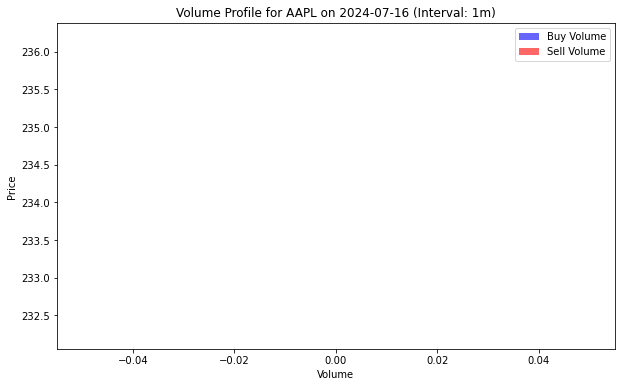

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start, intervals=['1m', '5m', '15m', '30m', '60m', '240m', '1d']):
    """
    Fetch stock data from Yahoo Finance for the given intervals and select the appropriate interval.
    :param ticker: Stock ticker symbol
    :param start: Start date for data (YYYY-MM-DD)
    :param intervals: List of intervals to try
    :return: DataFrame with stock data for the selected interval
    """
    for interval in intervals:
        data = yf.download(ticker, start=start, interval=interval)
        if len(data) < 5000:
            return data, interval
    return data, intervals[-1]  # Return data with the largest interval if all are above 5000 bars

def calculate_volume_profile(data, bins=25, volume_type='Up/Down'):
    """
    Calculate the volume profile.
    :param data: DataFrame with stock data
    :param bins: Number of bins for price levels
    :param volume_type: Type of volume to display ('Total', 'Up/Down', 'Delta')
    :return: volume profile DataFrame
    """
    price_min = data['Low'].min()
    price_max = data['High'].max()
    bin_edges = np.linspace(price_min, price_max, bins + 1)
    
    volume_profile = pd.DataFrame(index=bin_edges[:-1], columns=['Total Volume', 'Buy Volume', 'Sell Volume'])
    volume_profile['Total Volume'] = 0
    volume_profile['Buy Volume'] = 0
    volume_profile['Sell Volume'] = 0

    for index, row in data.iterrows():
        bin_indices = np.digitize([row['Low'], row['High']], bin_edges) - 1
        bin_indices = [max(0, min(bins-1, b)) for b in bin_indices]
        
        volume = row['Volume']
        if row['Close'] > row['Open']:
            buy_volume = volume
            sell_volume = 0
        else:
            buy_volume = 0
            sell_volume = volume
        
        for i in range(bin_indices[0], bin_indices[1] + 1):
            volume_profile.iloc[i]['Total Volume'] += volume
            volume_profile.iloc[i]['Buy Volume'] += buy_volume
            volume_profile.iloc[i]['Sell Volume'] += sell_volume
    
    if volume_type == 'Total':
        volume_profile['Volume'] = volume_profile['Total Volume']
    elif volume_type == 'Up/Down':
        volume_profile['Volume'] = volume_profile['Buy Volume'] - volume_profile['Sell Volume']
    elif volume_type == 'Delta':
        volume_profile['Volume'] = volume_profile['Buy Volume'] + volume_profile['Sell Volume']
    
    return volume_profile

def plot_volume_profile(volume_profile, title):
    """
    Plot the volume profile.
    :param volume_profile: DataFrame with volume profile
    :param title: Title for the plot
    """
    plt.figure(figsize=(10, 6))
    plt.barh(volume_profile.index, volume_profile['Buy Volume'], height=volume_profile.index[1] - volume_profile.index[0], color='blue', alpha=0.6, label='Buy Volume')
    plt.barh(volume_profile.index, volume_profile['Sell Volume'], height=volume_profile.index[1] - volume_profile.index[0], color='red', alpha=0.6, label='Sell Volume', left=volume_profile['Buy Volume'])
    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
ticker = 'AAPL'
start_date = '2024-07-16'

data, selected_interval = fetch_stock_data(ticker, start=start_date)
volume_profile = calculate_volume_profile(data, bins=25, volume_type='Up/Down')
plot_volume_profile(volume_profile, title=f'Volume Profile for {ticker} on {start_date} (Interval: {selected_interval})')
